# Étape 1 : Collecter les données financières
Collecte et analyse des données financières provenant des transactions
effectuées à l'aide de la blockchain.

### Transactions blockchain : Utilisation d'une API telle que celle de Infura (ou une autre API blockchain) pour collecter les données blockchain en temps réel (montants, tokens échangés, etc.).

### Outils : Python, API Infura pour les transactions blockchain.

### 1- importation

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go

from web3 import Web3
import csv
import datetime

In [2]:

# Infura Ethereum Mainnet URL (replace YOUR_INFURA_PROJECT_ID with your Infura Project ID)
infura_url = 'https://mainnet.infura.io/v3/00eda8a58f914657a92f986d6d10a529'
w3 = Web3(Web3.HTTPProvider(infura_url))

# Check if connected to Ethereum
if w3.is_connected():
    print("Connected to Ethereum Mainnet")
else:
    print("Failed to connect to Ethereum Mainnet")
    exit()

# Get the latest block
latest_block = w3.eth.block_number
print(f"Latest Block: {latest_block}")

# Open a CSV file to save transaction data
with open('last_200_blocks_transactions_analysis.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Block Number', 'Transaction Hash', 'From Address', 'To Address', 'Value (ETH)', 
                     'Gas Used', 'Gas Price (Gwei)', 'Nonce', 'Timestamp', 'Transaction Date', 'Status'])

    # Loop through the last 50 blocks
    for block_number in range(latest_block, latest_block - 200, -1):  
        print(f"Processing Block: {block_number}")
        
        # Fetch the transactions for the block
        try:
            block_data = w3.eth.get_block(block_number, full_transactions=True)
        except Exception as e:
            print(f"Error fetching block {block_number}: {e}")
            continue
        
        # Get the block timestamp and convert it to a human-readable date/time
        block_timestamp = block_data['timestamp']
        block_time = datetime.datetime.fromtimestamp(block_timestamp).strftime('%Y-%m-%d %H:%M:%S')

        # Loop through the block's transactions and save them to the CSV file
        for tx in block_data['transactions']:
            tx_hash = tx['hash'].hex()
            tx_from = tx['from']
            tx_to = tx['to']
            tx_value = w3.from_wei(tx['value'], 'ether')  # Convert from Wei to Ether
            gas_used = tx['gas']
            gas_price = w3.from_wei(tx['gasPrice'], 'gwei')  # Convert to Gwei
            nonce = tx['nonce']
            
            # Check if the transaction is successful (for contract calls)
            status = None
            if tx['to']:  # Check if the transaction interacts with a contract (not a simple ETH transfer)
                try:
                    # Fetch receipt to get the status for contract transactions
                    tx_receipt = w3.eth.get_transaction_receipt(tx_hash)
                    status = tx_receipt['status']
                except Exception as e:
                    status = "Error Fetching Status"  # In case the receipt fetch fails

            # If it's a simple ETH transfer (not interacting with a contract), status remains None
            if status is None:
                status = "N/A"  # No status for regular ETH transfers

            # Save the transaction data to the CSV file
            writer.writerow([block_number, tx_hash, tx_from, tx_to, tx_value, gas_used, gas_price, nonce, block_timestamp, block_time, status])

print(f"Transactions from the last 50 blocks saved to 'last_200_blocks_transactions_analysis.csv'")


Connected to Ethereum Mainnet
Latest Block: 21546991
Processing Block: 21546991
Processing Block: 21546990
Processing Block: 21546989
Processing Block: 21546988
Processing Block: 21546987
Processing Block: 21546986
Processing Block: 21546985
Processing Block: 21546984
Processing Block: 21546983
Processing Block: 21546982
Processing Block: 21546981
Processing Block: 21546980
Processing Block: 21546979
Processing Block: 21546978
Processing Block: 21546977
Processing Block: 21546976
Processing Block: 21546975
Processing Block: 21546974
Processing Block: 21546973
Processing Block: 21546972
Processing Block: 21546971
Processing Block: 21546970
Processing Block: 21546969
Processing Block: 21546968
Processing Block: 21546967
Processing Block: 21546966
Processing Block: 21546965
Processing Block: 21546964
Processing Block: 21546963
Processing Block: 21546962
Processing Block: 21546961
Processing Block: 21546960
Processing Block: 21546959
Processing Block: 21546958
Processing Block: 21546957
Pr

### Step 2: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`

In [41]:
df= pd.read_csv('last_200_blocks_transactions_analysis.csv')
df.head()

,Block Number,Transaction Hash,From Address,To Address,Value (ETH),Gas Used,Gas Price (Gwei),Nonce,Timestamp,Transaction Date,Status
0,21546991,bb04ccb54145006ac6b8e1ff0be2314e79fed99ba361ad...,0x39a08a1dC43A9DFbe604141652e1523996A7399f,0xd90e2f925DA726b50C4Ed8D0Fb90Ad053324F31b,1.00000,1024465,30.604139,0,1735943915,2025-01-03 23:38:35,1
1,21546991,3e8b5b18e69c2001ac7c77660805fe0a7898d383c4f39c...,0xBDE5eb8642833aF00854137c46C65092D91D1e15,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.00000,100000,59.410169,7,1735943915,2025-01-03 23:38:35,1
2,21546991,b3ee8beccca582eea7ad8591f68af5e226801605098890...,0x320f433834349A5f3f3FF5979f9644920bC2575A,0x1231DEB6f5749EF6cE6943a275A1D3E7486F4EaE,0.00000,403937,29.000000,12,1735943915,2025-01-03 23:38:35,1
3,21546991,d35f232a11fe792bea5f7679fbd3d9975a90e095fac636...,0x72637414064DD0304e41eE932f9d924E788Eee2A,0x56284f6638Eb7722430bfDF0Efb3120D77b4B807,0.01382,21000,25.604139,14,1735943915,2025-01-03 23:38:35,1
4,21546991,b4059b6c1a34588c19825b3f060633c7f4895740733061...,0x20C5B10046808c331e7AabF202b0c20Ca526CC0b,0xAA6624D7363Ef8284aA8ce4e18146dEd5f421b2c,0.00000,52102,16.876371,8589,1735943915,2025-01-03 23:38:35,1


In [42]:
df.shape

(34747, 11)

In [43]:
df.columns

Index(['Block Number', 'Transaction Hash', 'From Address', 'To Address',
       'Value (ETH)', 'Gas Used', 'Gas Price (Gwei)', 'Nonce', 'Timestamp',
       'Transaction Date', 'Status'],
      dtype='object')


1. **Block Number** : 
   - Le numéro du bloc Ethereum dans lequel la transaction a été incluse. Chaque transaction sur Ethereum est validée dans un bloc, et chaque bloc a un numéro unique qui représente sa position dans la blockchain.

2. **Transaction Hash** :
   - Un identifiant unique pour chaque transaction sur la blockchain. Il s'agit d'une chaîne de caractères hexadécimale qui représente le résultat du hachage de la transaction, utilisée pour retrouver et identifier chaque transaction sur le réseau Ethereum.

3. **From Address** :
   - L'adresse Ethereum de l'expéditeur (celui qui initie la transaction). C'est l'adresse du compte ou du contrat intelligent qui a envoyé des fonds ou exécuté une action.

4. **To Address** :
   - L'adresse Ethereum du destinataire de la transaction. Il peut s'agir d'une adresse de compte ou d'un contrat intelligent qui reçoit les fonds ou sur lequel une fonction est exécutée.

5. **Value (ETH)** :
   - La quantité d'Ether (ETH) transférée lors de la transaction. Elle est généralement exprimée en Ether, la cryptomonnaie native du réseau Ethereum, et convertie à partir de la plus petite unité appelée "wei".

6. **Gas Used** :
   - La quantité de "gas" consommée pour exécuter cette transaction. Le gas est une unité utilisée pour mesurer la quantité de travail informatique nécessaire pour traiter la transaction ou l'exécution d'un contrat intelligent.

7. **Gas Price (Gwei)** :
   - Le prix par unité de gas payé par l'expéditeur pour la transaction, exprimé en Gwei (1 Gwei = 0,000000001 ETH). Les utilisateurs définissent ce prix pour inciter les mineurs à inclure leurs transactions plus rapidement dans un bloc.

8. **Nonce** :
   - Un compteur utilisé par Ethereum pour suivre le nombre de transactions envoyées depuis une adresse spécifique. Chaque transaction a un nonce unique par adresse, ce qui empêche le double-spending ou les répétitions.

9. **Timestamp** :
   - L'horodatage Unix du bloc dans lequel la transaction a été incluse, exprimé en secondes depuis le 1er janvier 1970 (l'epoch Unix). Il indique l'heure exacte à laquelle le bloc a été validé.

10. **Transaction Date** :
   - La version lisible de l'horodatage, convertie au format humain (`AAAA-MM-JJ HH:MM:SS`), pour indiquer clairement la date et l'heure auxquelles la transaction a été incluse dans le bloc.

11. **Status** :
   - L'état final de la transaction :
     - `1` : La transaction a été exécutée avec succès.
     - `0` : La transaction a échoué (cela peut se produire si la transaction manque de gas ou si une condition dans un contrat intelligent n'a pas été remplie).
     - `"N/A"` : S'applique aux transactions simples sans interaction avec un contrat intelligent (comme les transferts d'ETH).

### Importance des colonnes :
- **"From Address" et "To Address"** vous permettent de savoir qui envoie et qui reçoit les fonds.
- **"Value (ETH)"** vous indique la valeur des transactions en Ether.
- **"Gas Used" et "Gas Price (Gwei)"** sont essentiels pour comprendre les frais associés à chaque transaction.
- **"Transaction Date"** vous permet d'analyser la chronologie des transactions.
- **"Status"** vous aide à filtrer les transactions réussies des échecs.

Cela vous permet de collecter, analyser et visualiser les tendances, volumes et comportements des transactions sur la blockchain Ethereum.

In [44]:
df.dtypes

Block Number          int64
Transaction Hash     object
From Address         object
To Address           object
Value (ETH)         float64
Gas Used              int64
Gas Price (Gwei)    float64
Nonce                 int64
Timestamp             int64
Transaction Date     object
Status               object
dtype: object

In [45]:
df.describe()

,Block Number,Value (ETH),Gas Used,Gas Price (Gwei),Nonce,Timestamp
count,3.474700e+04,34747.000000,3.474700e+04,34747.000000,3.474700e+04,3.474700e+04
mean,2.154689e+07,1.529494,2.057617e+05,12.993061,8.001751e+05,1.735943e+09
std,5.806552e+01,62.438252,6.613920e+05,47.652490,2.475715e+06,7.008290e+02
min,2.154679e+07,0.000000,2.100000e+04,8.143926,0.000000e+00,1.735942e+09
25%,2.154684e+07,0.000000,2.100000e+04,10.396780,8.000000e+00,1.735942e+09
50%,2.154689e+07,0.000324,7.574600e+04,11.347908,1.540000e+02,1.735943e+09
75%,2.154694e+07,0.036098,2.299300e+05,12.432700,8.339450e+04,1.735943e+09
max,2.154699e+07,9878.301600,1.653651e+07,5393.832126,1.326843e+07,1.735944e+09


### Step 3: Data Preperation
- 1. drop columns and rows
- 2. Conversion des types de données
- 3. Renaming Columns
- 4. Handling missing data and duplicates
- 5. Handling Outliers
- 6. Econding Categorical Columns

In [46]:
#- 1. drop columns and rows
df = df.drop(columns=['Timestamp'])

In [47]:
df.head()

,Block Number,Transaction Hash,From Address,To Address,Value (ETH),Gas Used,Gas Price (Gwei),Nonce,Transaction Date,Status
0,21546991,bb04ccb54145006ac6b8e1ff0be2314e79fed99ba361ad...,0x39a08a1dC43A9DFbe604141652e1523996A7399f,0xd90e2f925DA726b50C4Ed8D0Fb90Ad053324F31b,1.00000,1024465,30.604139,0,2025-01-03 23:38:35,1
1,21546991,3e8b5b18e69c2001ac7c77660805fe0a7898d383c4f39c...,0xBDE5eb8642833aF00854137c46C65092D91D1e15,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.00000,100000,59.410169,7,2025-01-03 23:38:35,1
2,21546991,b3ee8beccca582eea7ad8591f68af5e226801605098890...,0x320f433834349A5f3f3FF5979f9644920bC2575A,0x1231DEB6f5749EF6cE6943a275A1D3E7486F4EaE,0.00000,403937,29.000000,12,2025-01-03 23:38:35,1
3,21546991,d35f232a11fe792bea5f7679fbd3d9975a90e095fac636...,0x72637414064DD0304e41eE932f9d924E788Eee2A,0x56284f6638Eb7722430bfDF0Efb3120D77b4B807,0.01382,21000,25.604139,14,2025-01-03 23:38:35,1
4,21546991,b4059b6c1a34588c19825b3f060633c7f4895740733061...,0x20C5B10046808c331e7AabF202b0c20Ca526CC0b,0xAA6624D7363Ef8284aA8ce4e18146dEd5f421b2c,0.00000,52102,16.876371,8589,2025-01-03 23:38:35,1


In [48]:
# - 2. Conversion des types de données

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'],errors='coerce')
df['Value (ETH)'] = df['Value (ETH)'].astype(float)
df['Gas Price (Gwei)'] = df['Gas Price (Gwei)'].astype(float)
df['Gas Used'] = df['Gas Used'].astype(float)  

In [49]:
df.dtypes

Block Number                 int64
Transaction Hash            object
From Address                object
To Address                  object
Value (ETH)                float64
Gas Used                   float64
Gas Price (Gwei)           float64
Nonce                        int64
Transaction Date    datetime64[ns]
Status                      object
dtype: object

In [50]:
# - 3. Renaming Columns

df.rename(columns={
    'Block Number': 'Block_Number',
    'Transaction Hash': 'Transaction_Hash',
    'From Address': 'From_Address',
    'To Address': 'To_Address',
    'Value (ETH)': 'Value_ETH',
    'Gas Used': 'Gas_Used',
    'Gas Price (Gwei)': 'Gas_Price_Gwei',
    'Transaction Date': 'Trans_Date'
}, inplace=True)


In [51]:
df.columns

Index(['Block_Number', 'Transaction_Hash', 'From_Address', 'To_Address',
       'Value_ETH', 'Gas_Used', 'Gas_Price_Gwei', 'Nonce', 'Trans_Date',
       'Status'],
      dtype='object')

In [52]:
# 4. Handling missing data and duplicates

df.isnull().sum()

Block_Number         0
Transaction_Hash     0
From_Address         0
To_Address          61
Value_ETH            0
Gas_Used             0
Gas_Price_Gwei       0
Nonce                0
Trans_Date           0
Status              61
dtype: int64

In [53]:
df.dropna(subset=['To_Address', 'Status'], inplace=True)
df.isna().sum()

Block_Number        0
Transaction_Hash    0
From_Address        0
To_Address          0
Value_ETH           0
Gas_Used            0
Gas_Price_Gwei      0
Nonce               0
Trans_Date          0
Status              0
dtype: int64

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.loc[df.duplicated()]

,Block_Number,Transaction_Hash,From_Address,To_Address,Value_ETH,Gas_Used,Gas_Price_Gwei,Nonce,Trans_Date,Status


In [56]:
# -5 .Handling Outliers

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'Value_ETH')
df = remove_outliers_iqr(df, 'Gas_Used')
df = remove_outliers_iqr(df, 'Gas_Price_Gwei')

In [57]:
df.shape

(25918, 10)

In [ ]:
# 6. Encodage des colonnes catégoriques
# there is no columns categorical

In [58]:
# Save the cleaned data back to a new CSV file
df.to_csv('cleaned_transaction_data.csv', index=False)
df= pd.read_csv('cleaned_transaction_data.csv')
df.head(20)

,Block_Number,Transaction_Hash,From_Address,To_Address,Value_ETH,Gas_Used,Gas_Price_Gwei,Nonce,Trans_Date,Status
0,21546991,b44eef65793f01e5e06ecdefb1767328673b9616afdd3e...,0xC16157e00b1bFf1522C6F01246B4Fb621dA048d0,0x9a15bB3a8FEc8d0d810691BAFE36f6e5d42360F7,0.027993,228664.0,14.468592,255633,2025-01-03 23:38:35,1
1,21546991,852cbee2827d81bcfcf529b979c7579ad868c95489f8aa...,0xdE2fACa4BBC0aca08fF04D387c39B6f6325bf82A,0x58b6A8A3302369DAEc383334672404Ee733aB239,0.000000,80000.0,14.397476,115497,2025-01-03 23:38:35,1
2,21546991,4f02098dba57dc6b2c5c57574676fcfd1a76ae28b87393...,0xdE2fACa4BBC0aca08fF04D387c39B6f6325bf82A,0x58b6A8A3302369DAEc383334672404Ee733aB239,0.000000,80000.0,14.387783,115498,2025-01-03 23:38:35,1
3,21546991,2eca45f56b9c2f891aae14f31c9906c25d02f938f7312a...,0xdE2fACa4BBC0aca08fF04D387c39B6f6325bf82A,0x58b6A8A3302369DAEc383334672404Ee733aB239,0.000000,80000.0,14.387783,115499,2025-01-03 23:38:35,1
4,21546991,1433db784e74effd8e13a49048d7961b7e233be6f9e4c6...,0x8D6eb769643E465e6525B41C46D2d646393EEF95,0xb0486420CeB01fdE5D0B874740DcA38940Aa432c,0.000000,100974.0,13.397476,9,2025-01-03 23:38:35,1
5,21546991,22fd89e5278bd60c93498f49bc2baf620572a1fca2287d...,0xCEEcaEa7E7e1FE89C1aF5342639769445e53bf75,0xF2bfbD55119e6e446f9cc691a133c76d544D766D,0.031500,21000.0,12.626118,83,2025-01-03 23:38:35,1
6,21546991,e51169b75993b592271478e46e4131c90181d2feddcb2e...,0xcabc46F4cFF0ED2ce86B9feA2e808A381D44FA4a,0xc575BD129848Ce06A460A19466c30E1D0328F52C,0.000000,53951.0,12.604139,131,2025-01-03 23:38:35,1
7,21546991,8e2ca968a893b3da35767d1b685605ea17dd6b546c5a51...,0x267be1C1D684F78cb4F6a176C4911b741E4Ffdc0,0xb4656E4FEDc5895B234e171E75079136401DF9B8,0.014612,21000.0,12.604139,4478623,2025-01-03 23:38:35,1
8,21546991,e6eafca1d5374097bd41cdd3fce5c7affd55808b5a51b7...,0xcabc46F4cFF0ED2ce86B9feA2e808A381D44FA4a,0x3fC91A3afd70395Cd496C647d5a6CC9D4B2b7FAD,0.000000,351909.0,12.604139,132,2025-01-03 23:38:35,1
9,21546991,5fdf4eaff7bb45b077a649674093f75301641bb5158c06...,0xAe2D4617c862309A3d75A0fFB358c7a5009c673F,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,59890.0,12.604139,1223257,2025-01-03 23:38:35,1


# Analyse des donnees
• Utilisation de pandas et numpy pour analyser les volumes de
transactions, les comportements de dépenses et les mouvements de
cryptomonnaies.


Data Analysis : Python (pandas, numpy) pour l'analyse des données
financières et des transactions blockchain.
• Visualisation : Matplotlib, Seaborn, Plotly, Grafana pour les tableaux de bord
financiers et blockchain.

Tableaux de bord interactifs :
-pour la visualisation en temps réel des
transactions financières (traditionnelles et blockchain).
-pour visualiser les tendances financières, les flux de trésorerie et les volumes de transactions
blockchain. 
-pour visualiser en temps réel les transactions blockchain (montants, tokens échangés) ainsi que
les transactions traditionnelles.

## I- Analyse des volumes de transactions, les comportements de dépenses et les mouvements de cryptomonnaies.

### 1. Analyse des volumes de transactions :

In [60]:
# 1- Nombre de transactions par bloc
volume_transactions_par_bloc = df.groupby('Block_Number')['Value_ETH'].agg(['count', 'sum']).reset_index()


volume_transactions_par_bloc.columns = ['Block_Number', 'Nombre_Transactions', 'Volume_Total_ETH']

volume_transactions_par_bloc.head()




,Block_Number,Nombre_Transactions,Volume_Total_ETH
0,21546792,236,1.813806
1,21546793,149,1.134339
2,21546794,35,0.493698
3,21546795,259,3.034619
4,21546796,182,2.676479


In [61]:
# nombre de transactions par time
transactions_per_datetime = df.groupby('Trans_Date').size().reset_index(name='Number of Transactions')
transactions_per_datetime.head()


,Trans_Date,Number of Transactions
0,2025-01-03 22:58:35,236
1,2025-01-03 22:58:47,149
2,2025-01-03 22:58:59,35
3,2025-01-03 22:59:11,259
4,2025-01-03 22:59:23,182


In [62]:
# Somme des valeurs des transactions (en ETH)
df = df[df['Status']=='1'].copy()
total_volume_eth = df['Value_ETH'].sum()
print(f"Volume total des transactions en ETH : {total_volume_eth:.2f} ETH")

Volume total des transactions en ETH : 255.79 ETH


In [63]:
# Calcul du volume total de gaz utilisé
volume_total_gaz = df['Gas_Used'].sum()

# Affichage du résultat
print(f"Le volume total de gaz utilisé est : {volume_total_gaz} unités")


Le volume total de gaz utilisé est : 3163389270.0 unités


### 2. Analyse des comportements de dépenses :

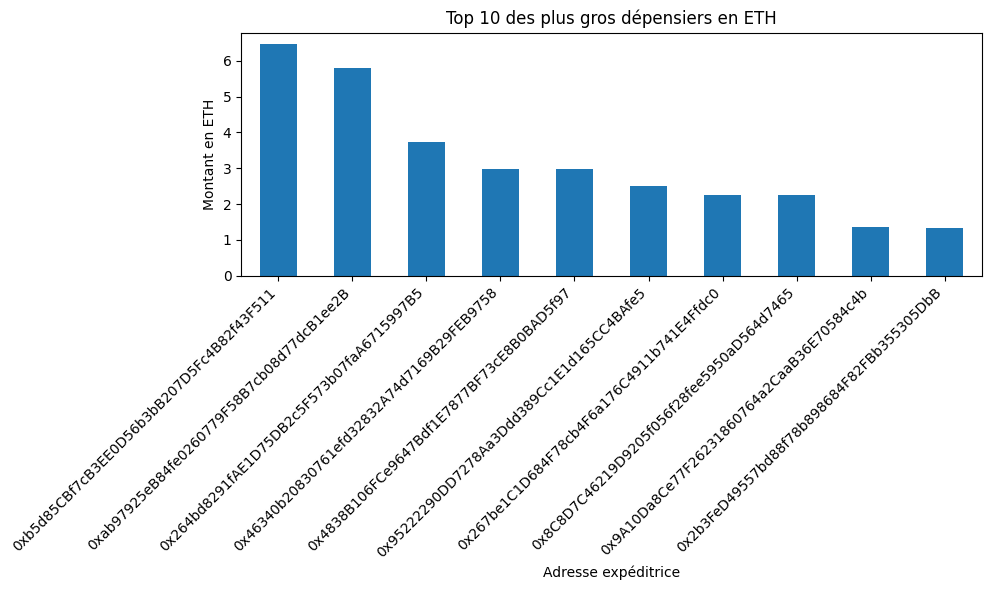

In [64]:
# Transactions par utilisateur (From Address)
depense_par_utilisateur = df.groupby('From_Address')['Value_ETH'].sum()

top_10_depense_par_utilisateur = depense_par_utilisateur.nlargest(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_10_depense_par_utilisateur.plot(kind='bar', ax=ax)

ax.set_title("Top 10 des plus gros dépensiers en ETH")
ax.set_xlabel("Adresse expéditrice")
ax.set_ylabel("Montant en ETH")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


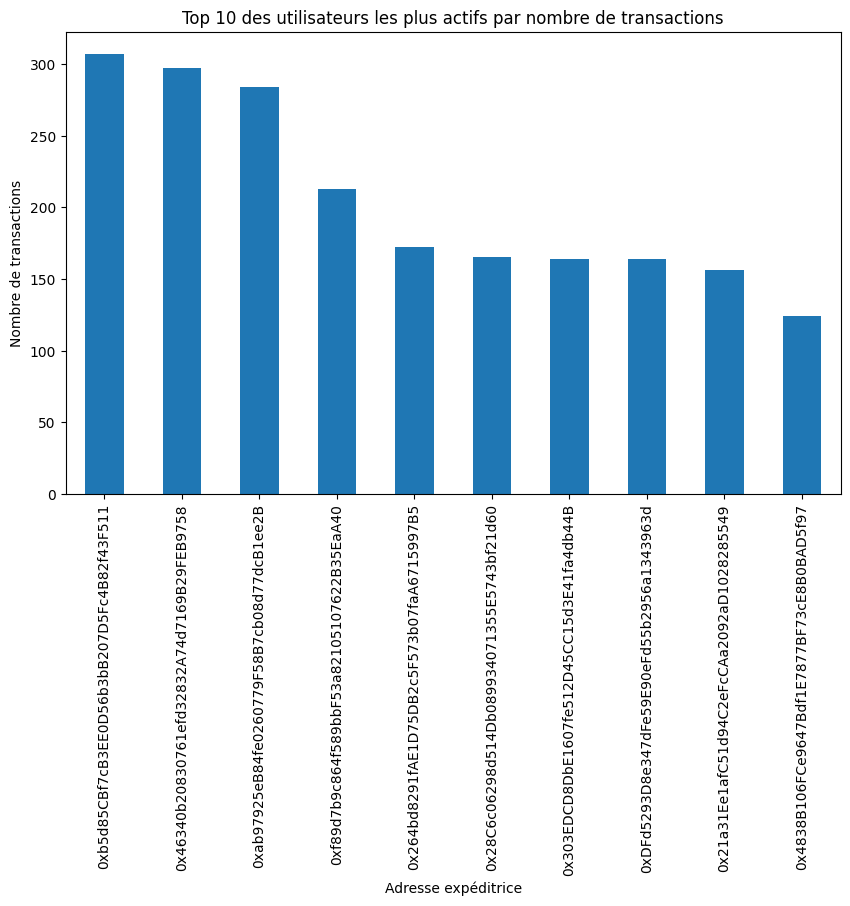

In [65]:
# Nombre de transactions par adresse expéditrice
nb_transactions_par_utilisateur = df['From_Address'].value_counts()


# le nombre de transactions des 10 utilisateurs les plus actifs
nb_transactions_par_utilisateur.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 des utilisateurs les plus actifs par nombre de transactions")
plt.xlabel("Adresse expéditrice")
plt.ylabel("Nombre de transactions")
plt.show()


### 3.Analyser les mouvements de cryptomonnaies

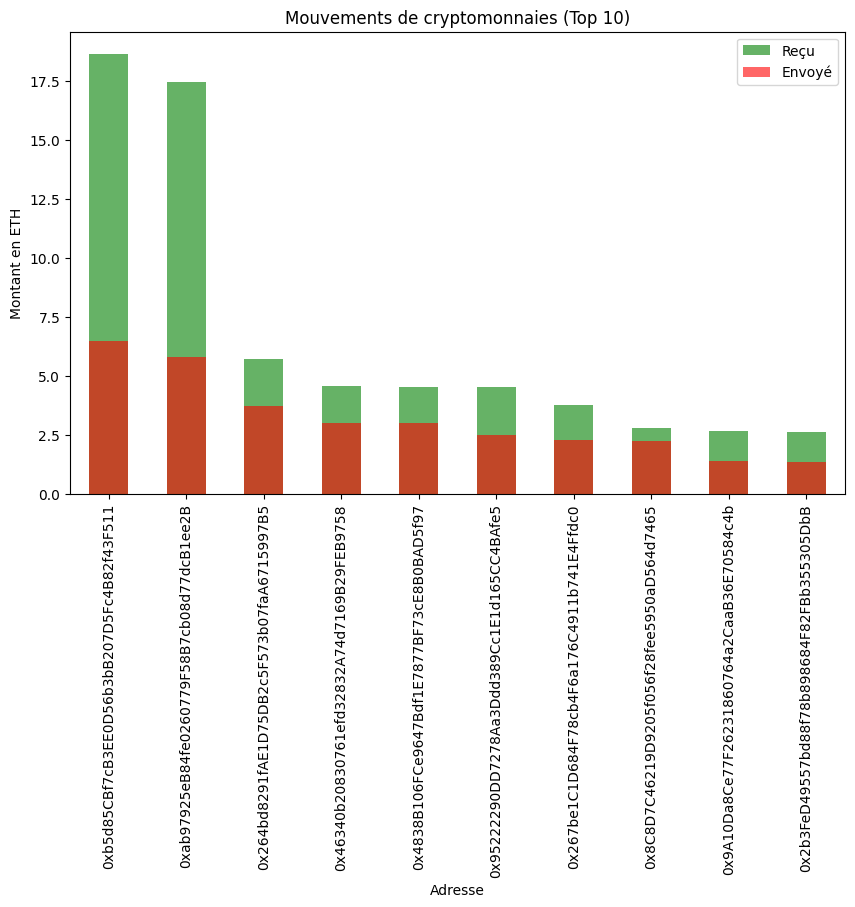

In [66]:
# a- Mouvements entrants et sortants

# Total reçu par chaque adresse (To Address)
total_recu_par_utilisateur = df.groupby('To_Address')['Value_ETH'].sum()

# Total envoyé par chaque adresse (From Address)
total_envoye_par_utilisateur = df.groupby('From_Address')['Value_ETH'].sum()


# Visualiser les mouvements entrants et sortants
plt.figure(figsize=(10, 6))
total_recu_par_utilisateur.sort_values(ascending=False).head(10).plot(kind='bar', color='green', alpha=0.6, label='Reçu')
total_envoye_par_utilisateur.sort_values(ascending=False).head(10).plot(kind='bar', color='red', alpha=0.6, label='Envoyé')
plt.title("Mouvements de cryptomonnaies (Top 10)")
plt.xlabel("Adresse")
plt.ylabel("Montant en ETH")
plt.legend()
plt.show()


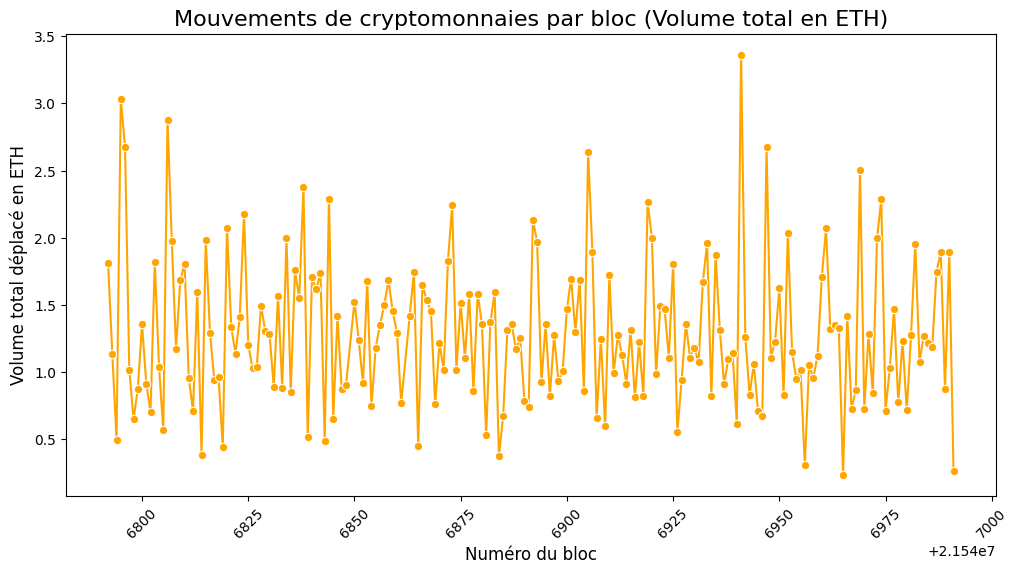

In [67]:
## b-Mouvements de cryptomonnaies par bloc (Volume total en ETH)
mouvements_par_bloc = df.groupby('Block_Number')['Value_ETH'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Block_Number', y='Value_ETH', data=mouvements_par_bloc, marker='o', color='orange')

plt.title("Mouvements de cryptomonnaies par bloc (Volume total en ETH)", fontsize=16)
plt.xlabel("Numéro du bloc", fontsize=12)
plt.ylabel("Volume total déplacé en ETH", fontsize=12)
plt.xticks(rotation=45)
plt.show()


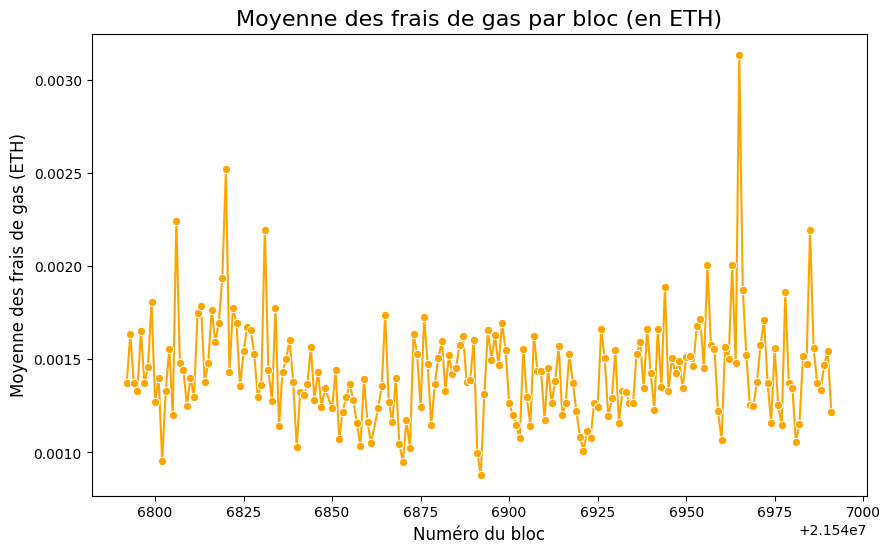

In [68]:
# Moyenne des frais de gas par bloc (en ETH)
# Assurez-vous que 'Gas Used' et 'Gas Price (Gwei)' sont bien au format numérique
df['Gas_Used'] = pd.to_numeric(df['Gas_Used'], errors='coerce')
df['Gas_Price_Gwei'] = pd.to_numeric(df['Gas_Price_Gwei'], errors='coerce')

# Calculer les frais de gas (Gas Used * Gas Price en ETH)
# Note: 1 Gwei = 1e-9 ETH, donc il faut convertir en ETH
df['Gas_Fees_ETH'] = df['Gas_Used'] * df['Gas_Price_Gwei'] * 1e-9

# Grouper par bloc et calculer la moyenne des frais de gas par bloc
moyenne_frais_gas_par_bloc = df.groupby('Block_Number')['Gas_Fees_ETH'].mean().reset_index()

# Visualiser la moyenne des frais de gas par bloc avec un lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Block_Number', y='Gas_Fees_ETH', data=moyenne_frais_gas_par_bloc, marker='o', color='orange')

# Ajouter des labels et un titre
plt.title("Moyenne des frais de gas par bloc (en ETH)", fontsize=16)
plt.xlabel("Numéro du bloc", fontsize=12)
plt.ylabel("Moyenne des frais de gas (ETH)", fontsize=12)

# Afficher le graphique
plt.show()


# II- Tableau de bord

In [73]:
# Exemple de "flux de trésorerie" : somme des transactions par bloc ou par minute
df['Trans_Date'] = pd.to_datetime(df['Trans_Date'])
flux_tresorerie = df.groupby(df['Trans_Date'].dt.floor('min'))['Value_ETH'].sum().reset_index()
flux_tresorerie.columns = ['Datetime', 'Flux Financier (ETH)']

# Visualiser avec Plotly (Exemple de flux financier par minute)
fig = px.line(flux_tresorerie, x='Datetime', y='Flux Financier (ETH)', title='Flux de trésorerie par minute')
fig.show()

# Visualisation des volumes de transactions par bloc avec Plotly
volume_par_bloc = df.groupby('Block_Number')['Value_ETH'].sum().reset_index()
fig2 = px.bar(volume_par_bloc, x='Block_Number', y='Value_ETH', title='Volume des transactions par bloc')
fig2.show()

# Visualisation des frais de gas par bloc
frais_de_gas_par_bloc = df.groupby('Block_Number')['Gas_Fees_ETH'].sum().reset_index()
fig3 = px.line(frais_de_gas_par_bloc, x='Block_Number', y='Gas_Fees_ETH', title='Frais de gas par bloc')
fig3.show()
